In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [19]:
manufact = pd.read_csv(path +'사업체_종사자수.csv', encoding='cp949')
sigungu = pd.read_csv(path + 'sigungu_imp_10.csv', encoding='cp949')

In [20]:
sigungu.head(1)

,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,화재,교통,자연재해,범죄,안전사고,자살,감염병
0,2015,강원도,강릉시,2015_강원도_강릉시,1161.45445,121.96083,0.04634,0.13901,25.67109,2.03886,1559476.199,37.53354,335.85565,0.02344,0.3707,1668.57424,58.84888,0.00457,77.36,228.30585,392.99003,0.83408,0.04634,0.00641,0.64111,32.34371,44.85489,2.22421,12.51118,0.41704,314.30862,108.15219,36.42143,0.32436,0.02316,2.31551,660.14293,0.13173,13.17299,404.29643,53.98342,22.52012,4.63377,0.50971,1.29746,0.55605,0.50971,0.13901,0.0,48.65458,68.02374,108.61557,309.39682,19.69352,0.0,0.0,0.0817,229.04725,99.99013,0.00176,4.9,-37.53354,23.2,2.25,773.56156,598.26604,406.61332,191.65273,2.0,9931.4202,47.9,27.61727,0.0,98.65296,89.98781,76.78157,4.7,73.9,59.8,0.00471,0.47098,70.20162,201.29097,489.5578,53.98342,14.78173,458.8359,222.69899,224.83052,6229719.75,0.41704,21.91773,0.09268,209.07,32.2,0.80524,4428.91102,3.66068,0.00231,0.0,0.0,5886.61005,0.0,0.04634,605.49472,2261.65046,17.39,64.61,2.27055,0.00123,0.12303,53.56638,300.31463,99.4,0.01616,215807.0,1283.55429,2266.60859,5034.96179,1200.47079,0.741,4.0,0.438,0.553,59.98,7.08967,4.68011,522.87461,2564.56,1371.82761,0.78774,1.52914,0.02068,2.06752,0.02235,0.50971,0.55605,1.62182,0.07086,1040.37773,9.91627,10.79668,0.09268,72985.02829,0.88042,1.57548,0.17458,271425.0696,1,0,1,1,1,1,1


In [21]:
sigu = sigungu.loc[:,['년도','시군구','시도','지역','제조업 업체수','교통사고 발생건수','음주교통사고 발생건수','제조업 종사자수']]
sigu.shape

(226, 8)

## 제조업체 비율이 높은 집단은, 음주사고 발생 비율이 높은 경향성을 보일 것이다.

### 전체 사업체수 분리하기

In [22]:
ex_manufact = manufact.loc[manufact['산업분류별']=='전체',['지역별(시/군/구)','2015']]
ex_manufact.columns = ['시군구','전체산업체수']
ex_manufact.shape #지역별(시/군/구)

(160, 2)

In [23]:
ex_manufact.reset_index(drop=True, inplace=True)
ex_manufact

,시군구,전체산업체수
0,경기도,447057
1,수원시,34481
2,성남시,35880
3,의정부시,11865
4,안양시,24305
5,부천시,29644
6,광명시,9253
7,평택시,16779
8,동두천시,2486
9,안산시,27202


### 제조업수 데이터만들기

In [24]:
manufact = manufact.loc[~(manufact['산업분류별']=='전체'),['지역별(시/군/구)','2015']]
manufact.columns = ['시군구','제조업체수']
manufact.shape

(160, 2)

### 제조업 비율 만들기

In [25]:
manufact.reset_index(drop=True, inplace=True)

In [26]:
manufact['제조업비율'] = (manufact['제조업체수']/ex_manufact['전체산업체수'])*100

In [27]:
manufact

,시군구,제조업체수,제조업비율
0,경기도,95998,21.473324
1,수원시,2361,6.847249
2,성남시,3247,9.049610
3,의정부시,849,7.155499
4,안양시,2950,12.137420
5,부천시,7863,26.524760
6,광명시,1324,14.308873
7,평택시,2802,16.699446
8,동두천시,289,11.625101
9,안산시,7296,26.821557


In [28]:
df2 = pd.merge(sigu, manufact, left_on='시군구',right_on='시군구')

In [29]:
df2.drop([2,3], axis=0, inplace=True)

In [30]:
df2.shape

(151, 10)

### 음주사고비율 만들기

In [31]:
df2['음주교통사고비율'] = (df2['음주교통사고 발생건수']/df2['교통사고 발생건수'])*100
df2.columns=['년도','시군구','시도','지역',
             '전체교통사고발생건수','음주교통사고발생건수','제조업체수','제조업비율','음주교통사고비율']

ValueError: Length mismatch: Expected axis has 11 elements, new values have 9 elements

In [32]:
df2

,년도,시군구,시도,지역,제조업 업체수,교통사고 발생건수,음주교통사고 발생건수,제조업 종사자수,제조업체수,제조업비율,음주교통사고비율
0,2015,강릉시,강원도,2015_강원도_강릉시,53.56638,228.30585,53.98342,300.31463,663,8.115055,23.645220
1,2015,고성군,강원도,2015_강원도_고성군,57.81493,173.44478,52.52899,313.19171,104,10.136452,30.285714
4,2015,고성군,경상남도,2015_경상남도_고성군,103.36934,154.87517,44.70992,1523.71414,321,19.395770,28.868359
5,2015,동해시,강원도,2015_강원도_동해시,49.49134,191.51456,53.08686,348.87164,242,7.576706,27.719490
6,2015,삼척시,강원도,2015_강원도_삼척시,43.83660,169.12354,57.25032,220.42758,154,6.194690,33.851184
7,2015,속초시,강원도,2015_강원도_속초시,41.12481,217.14868,62.35443,223.94216,166,5.176177,28.715086
8,2015,양구군,강원도,2015_강원도_양구군,40.18754,112.19022,38.51306,182.93704,64,8.432148,34.328358
9,2015,양양군,강원도,2015_강원도_양양군,73.76185,210.74816,58.86414,394.60775,103,9.171861,27.931034
10,2015,영월군,강원도,2015_강원도_영월군,51.00644,144.31092,35.82892,444.12928,129,8.722110,24.827588
11,2015,원주시,강원도,2015_강원도_원주시,50.78034,276.32817,70.51807,532.94917,1076,8.686526,25.519682


In [33]:
df2['음주교통사고 발생건수'].sum()

7159.827009999999

In [34]:
df2['제조업비율'].mean()

15.195125293257007

In [35]:
len(df2)

151

### 제조업 비율 높은집단, 낮은 집단으로 분리하기

In [36]:
#제조업 비율이 평균보다 높은 집단
a = df2.loc[(df2['제조업비율'])>=df2['제조업비율'].mean(),:]
a['group'] = 1
len(a)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


47

In [37]:
#a['그룹음주사고비율'] = a['음주교통사고 발생건수'].apply(lambda x: x /7159.82)

In [38]:
#제조업 비율이 평균보다 낮은 집단
b = df2.loc[~((df2['제조업비율'])>=df2['제조업비율'].mean()),:]
b['group'] = 0
len(b)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


104

In [39]:
round(len(a)/(len(a)+len(b)),2),round(len(b)/(len(a)+len(b)),2)

(0.31, 0.69)

In [40]:
b.head(1)

,년도,시군구,시도,지역,제조업 업체수,교통사고 발생건수,음주교통사고 발생건수,제조업 종사자수,제조업체수,제조업비율,음주교통사고비율,group
0,2015,강릉시,강원도,2015_강원도_강릉시,53.56638,228.30585,53.98342,300.31463,663,8.115055,23.64522,0


In [41]:
# b['그룹음주사고비율'] = b['음주교통사고 발생건수'].apply(lambda x: x /7159.82)

In [42]:
print('음주사고건수에서 a집단이 차지하는 비율')
round(a['음주교통사고 발생건수'].sum()/df2['음주교통사고 발생건수'].sum(),2)

음주사고건수에서 a집단이 차지하는 비율


0.33

In [43]:
print('음주사고건수에서 b집단이 차지하는 비율')
round(b['음주교통사고 발생건수'].sum()/df2['음주교통사고 발생건수'].sum(),2)

음주사고건수에서 b집단이 차지하는 비율


0.67

In [44]:
print('음주사고비율에서 a집단이 차지하는 비율')
round(a['음주교통사고비율'].sum()/df2['음주교통사고비율'].sum(),2)

음주사고비율에서 a집단이 차지하는 비율


0.28

In [45]:
print('음주사고비율에서 b집단이 차지하는 비율')
# round(b['음주교통사고 발생건수'].sum()/df2['음주교통사고 발생건수'].sum(),2)
round(b['음주교통사고비율'].sum()/df2['음주교통사고비율'].sum(),2)

음주사고비율에서 b집단이 차지하는 비율


0.72

In [46]:
a = df2.loc[(df2['제조업체수'])>=df2['제조업체수'].mean(),:]
a['group'] = 1

b = df2.loc[~((df2['제조업체수'])>=df2['제조업체수'].mean()),:]
b['group'] = 0
len(a), len(b)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(37, 114)

In [47]:
round(len(a)/(len(a)+len(b)),2),round(len(b)/(len(a)+len(b)),2)

(0.25, 0.75)

In [48]:
print('음주사고 중 a집단이 차지하는 비율')
round(a['음주교통사고 발생건수'].sum()/df2['음주교통사고 발생건수'].sum(),2)

음주사고 중 a집단이 차지하는 비율


0.23

In [49]:
print('음주사고 중 b집단이 차지하는 비율')
round(b['음주교통사고 발생건수'].sum()/df2['음주교통사고 발생건수'].sum(),2)

음주사고 중 b집단이 차지하는 비율


0.77

In [50]:
print('음주사고비율에서 a집단이 차지하는 비율')
round(a['음주교통사고비율'].sum()/df2['음주교통사고비율'].sum(),2)

음주사고비율에서 a집단이 차지하는 비율


0.18

In [51]:
print('음주사고비율에서 b집단이 차지하는 비율')
round(b['음주교통사고비율'].sum()/df2['음주교통사고비율'].sum(),2)

음주사고비율에서 b집단이 차지하는 비율


0.82

In [52]:
###########

In [53]:
df2

,년도,시군구,시도,지역,제조업 업체수,교통사고 발생건수,음주교통사고 발생건수,제조업 종사자수,제조업체수,제조업비율,음주교통사고비율
0,2015,강릉시,강원도,2015_강원도_강릉시,53.56638,228.30585,53.98342,300.31463,663,8.115055,23.645220
1,2015,고성군,강원도,2015_강원도_고성군,57.81493,173.44478,52.52899,313.19171,104,10.136452,30.285714
4,2015,고성군,경상남도,2015_경상남도_고성군,103.36934,154.87517,44.70992,1523.71414,321,19.395770,28.868359
5,2015,동해시,강원도,2015_강원도_동해시,49.49134,191.51456,53.08686,348.87164,242,7.576706,27.719490
6,2015,삼척시,강원도,2015_강원도_삼척시,43.83660,169.12354,57.25032,220.42758,154,6.194690,33.851184
7,2015,속초시,강원도,2015_강원도_속초시,41.12481,217.14868,62.35443,223.94216,166,5.176177,28.715086
8,2015,양구군,강원도,2015_강원도_양구군,40.18754,112.19022,38.51306,182.93704,64,8.432148,34.328358
9,2015,양양군,강원도,2015_강원도_양양군,73.76185,210.74816,58.86414,394.60775,103,9.171861,27.931034
10,2015,영월군,강원도,2015_강원도_영월군,51.00644,144.31092,35.82892,444.12928,129,8.722110,24.827588
11,2015,원주시,강원도,2015_강원도_원주시,50.78034,276.32817,70.51807,532.94917,1076,8.686526,25.519682


In [54]:
# a = df2.loc[(df2['제조업체수']>=df2['제조업체수'].median())&(df2['제조업 종사자수']>=df2['제조업 종사자수'].median()),:]
# a['group'] = 1

# b = df2.loc[~((df2['제조업체수']>=df2['제조업체수'].median())&(df2['제조업 종사자수']>=df2['제조업 종사자수'].median())),:]
# b['group'] = 0
# len(a), len(b)

In [131]:
# a = df2.loc[(df2['제조업 업체수']>=df2['제조업 업체수'].mean())&
#              ((df2['제조업 종사자수']>=df2['제조업 종사자수'].mean())),:]
# a['group'] = 1
# b = df2.loc[~((df2['제조업 업체수']>=df2['제조업 업체수'].mean())&
#              ((df2['제조업 종사자수']>=df2['제조업 종사자수'].mean()))),:]
# b['group'] = 0
a = df2.loc[(df2['제조업 업체수']>=df2['제조업 업체수'].mean()),:]
a['group'] = 1
b = df2.loc[~(df2['제조업 업체수']>=df2['제조업 업체수'].mean()),:]
b['group'] = 0
(len(a), len(b)),(len(a)/(len(a)+len(b)), len(b)/(len(a)+len(b)))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


((45, 106), (0.2980132450331126, 0.7019867549668874))

In [133]:
A=a['음주교통사고 발생건수'].sum()
B=b['음주교통사고 발생건수'].sum()
A,B

(2245.77699, 4914.050019999999)

In [134]:
A/len(a),B/len(b)

(49.90615533333333, 46.35896245283018)

In [125]:
aratio = A/(len(a)+len(b))
bratio = B/(len(a)+len(b))
aratio, bratio

(24.511441920529805, 22.90463099337748)

In [126]:
f'{aratio/(aratio+bratio)}%, {bratio/(aratio+bratio)}%'

'0.516943736885062%, 0.48305626311493793%'

In [127]:
5325/(1834+5325)

0.7438189691297667

In [128]:
b['그룹음주사고비율'].mean()

KeyError: '그룹음주사고비율'

In [72]:
a['그룹음주사고비율'].mean()

KeyError: '그룹음주사고비율'

In [197]:
full = pd.concat([a,b], axis=0)
full.shape
full

,년도,시군구,시도,지역,교통사고 발생건수,음주교통사고 발생건수,제조업체수,제조업비율,음주사고비율,group
4,2015,고성군,경상남도,2015_경상남도_고성군,154.87517,44.70992,321,19.395770,28.868359,1
25,2015,광주시,경기도,2015_경기도_광주시,226.93052,39.78478,5077,35.991777,17.531701,1
27,2015,군포시,경기도,2015_경기도_군포시,134.08089,25.93548,2296,25.579323,19.343159,1
28,2015,김포시,경기도,2015_경기도_김포시,216.00893,43.16652,7010,43.966382,19.983674,1
29,2015,남양주시,경기도,2015_경기도_남양주시,162.87469,31.99970,3945,21.998550,19.646822,1
31,2015,부천시,경기도,2015_경기도_부천시,174.93274,35.99872,7863,26.524760,20.578606,1
34,2015,시흥시,경기도,2015_경기도_시흥시,290.77207,49.05749,9423,42.994023,16.871459,1
35,2015,안산시,경기도,2015_경기도_안산시,246.13068,47.76260,7296,26.821557,19.405383,1
36,2015,안성시,경기도,2015_경기도_안성시,281.14967,54.92149,1923,27.307583,19.534609,1
38,2015,양주시,경기도,2015_경기도_양주시,218.93187,52.95142,3135,35.853156,24.186255,1


In [205]:
full.loc[full['group'] == 0]['음주사고비율']

0      23.645220
1      30.285714
5      27.719490
6      33.851184
7      28.715086
8      34.328358
9      27.931034
10     24.827588
11     25.519682
12     20.066889
13     18.825301
14     27.951392
15     24.852856
16     29.857142
17     16.714082
18     25.073964
19     24.610591
20     18.650792
21     17.901233
22     20.401179
23     13.742876
24     18.476116
26     15.505766
30     27.369038
32     18.243487
33     21.143264
37     18.176838
39     16.804408
40     28.082189
41     17.333037
42     15.834587
44     19.709144
45     17.794387
51     26.410882
52     32.309750
54     41.681899
57     41.842103
60     17.062312
63     30.827386
64     29.310346
66     38.784071
67     35.902632
73     26.808144
74     33.894032
75     43.431636
76     28.461959
78     29.445757
79     29.947232
80     47.904191
81     33.458446
83     31.922400
84     50.000000
85     33.965249
86     38.753798
88     40.281689
90     25.786608
91     42.576028
92     40.729486
93     33.6448

### T검증 하는 과정

In [208]:
# 연속형 변수 중에 DI1_pr에 따라 평균이 다른 변수만 추출
import matplotlib.pyplot as plt
import seaborn as sns # plt, sns는 그림을 그리기 위함
import scipy.stats as stats # t-test를 하기 위함

def con_check(var1, var2, data): # var1에는 질병에 관한 변수, var2는 연속형 변수들, data는 확인할 dataframe
    var1_0 = data.loc[data[var1] == 0][var2] # var1==0인 경우의 var2값
    var1_1 = data.loc[data[var1] == 1][var2] # var1==1인 경우의 var2값
    g = sns.distplot(var1_0, label = '제조업비율 높음')
    g = sns.distplot(var1_1, label = '제조업비율 낮음') #각 경우의 분포 그래프 그리기
    g.legend()
    plt.show()
    
    
    # t-test하기 전에 먼저 두 집단의 var2변수가 등분산을 충족하는지 검정
    # H0(귀무가설) : 두 모집단의 분산은 같다
    # H1(대립가설) : 두 모집단의 분산은 다르다
    equal_variance=stats.levene(var1_0, var1_1)
    print('등분산 검정에 대한 p-value : %s'%equal_variance[1]) # 등분산 검정에 대한 p-value
    
    
    # 독립표본 T검정
    #H0(귀무가설) : var1에 따른 var2의 평균에 차이가 없다
    #H1(대립가설) : var1에 따른 var2의 평균에 차이가 있다
     
    
    # 등분산 검정에 대한 p-value가 0.05보다 작은 경우, H0를 기각하므로 두 모집단의 분산은 다른다
    if equal_variance[1] < 0.05:
        print('등분산 검정에 대한 p-value가 0.05보다 작다')
        # 두 모집단의 분산이 다른 경우, equal_var=False로 놓고 독립표본 t-검정 진행
        t = stats.ttest_ind(var1_0, var1_1, equal_var=False)
        print('t-test에 대한 p-vlaue : %s'%t[1])
        if t[1] < 0.05:
            print('T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★')
            return var2
        else:
            print('T-test에 대한 p-value가 0.05보다 크므로 HO를 채택')
            
    # 등분산 검정에 대한 p-value가 0.05보다 큰 경우, H0를 채택하므로 두 모집단의 분산은 같다.
    else: 
        # 두 모집단의 분산이 같은 경우, equal_var=True로 놓고 독립표본 t-검정 진행
        t = stats.ttest_ind(var1_0, var1_1, equal_var=True)
        print('t-test에 대한 p-vlaue : %s'%t[1])
        
        if t[1] < 0.05:
            print('T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★')
            return var2
        else:
            print('T-test에 대한 p-value가 0.05보다 크므로 HO를 채택')
            

C:\Users\COM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


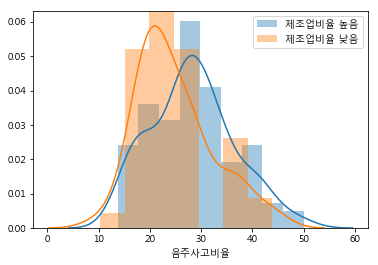

등분산 검정에 대한 p-value : 0.478876245169249
t-test에 대한 p-vlaue : 0.013773430226540614
T-test에 대한 p-value가 0.05보다 작으므로 HO를 기각한다★


'음주사고비율'

In [209]:
con_check('group','음주사고비율',full)